#  Diabetes Progression Prediction using Decision Tree

This notebook demonstrates how to apply a **Decision Tree Regressor** on the diabetes dataset from `sklearn.datasets`, including **model training**, **evaluation**, and **pruning** to reduce overfitting.

---

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

##  Step 1: Load and Understand the Dataset

We use the built-in diabetes dataset which includes:
- 10 numerical features (like BMI, age, blood pressure)
- A target variable that represents a quantitative measure of disease progression one year after baseline

We convert it to a Pandas DataFrame for easy exploration.

In [2]:
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# ⚙Step 2: Prepare the Data

We:
- Separate features (X) and target (y)
- Split the data into training and testing sets using `train_test_split`

This allows us to evaluate how well the model generalizes to unseen data.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Step 3: Train a Basic Decision Tree Regressor

We train a `DecisionTreeRegressor` without any pruning.
This helps us observe the default behavior — often leading to overfitting because the tree grows until all leaves are pure.

We'll evaluate the model using:
- **R² Score** (coefficient of determination)
- **Mean Squared Error (MSE)**

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)
mse = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('MSE: %.3f' % mse)
print('R2_test: %.3f' % r2_test)
print('R2_train: %3f' %r2_train)

MSE: 0.000
R2_test: 0.061
R2_train: 1.000000


##  Step 4: Prune the Tree to Prevent Overfitting

To reduce overfitting, we apply **pre-pruning** by setting:
- `max_depth`: limits how deep the tree can go
- `min_samples_leaf`: ensures each leaf has a minimum number of samples

This leads to a simpler, more generalizable model.

We compare performance before and after pruning using R² scores and visualize the resulting tree structure.

In [10]:
pruned_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=42)
pruned_tree.fit(X_train, y_train)
y_pred_pruned = pruned_tree.predict(X_test)
print("Pruned Tree Testing R²:", r2_score(y_test, y_pred_pruned))

Pruned Tree Testing R²: 0.4159289074356103


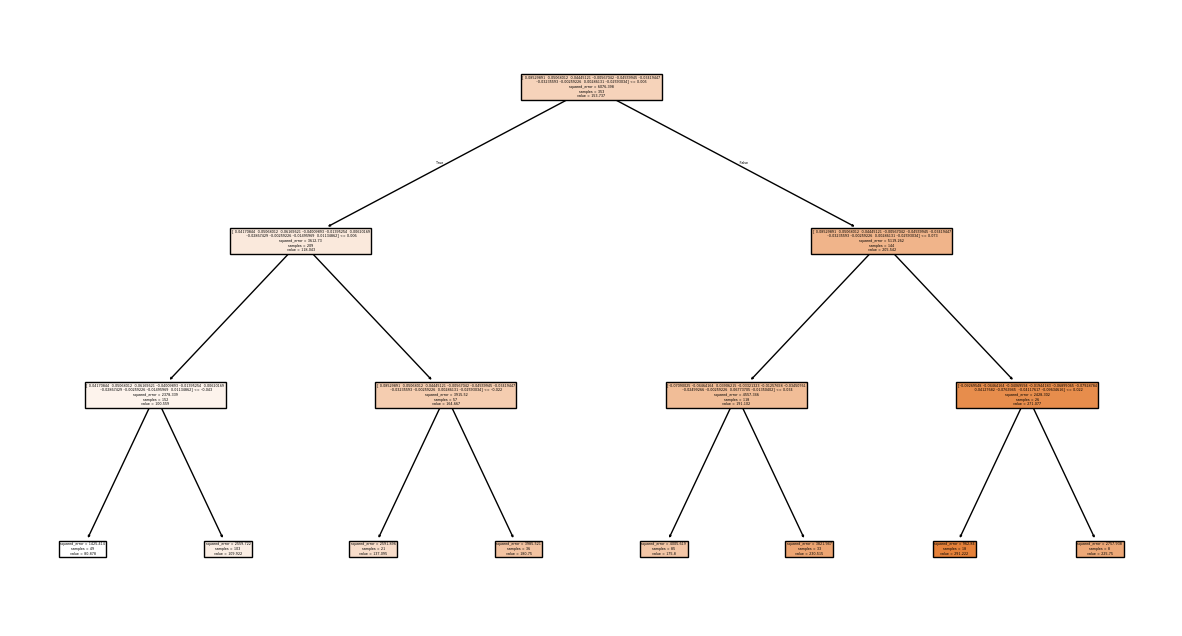

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plot_tree(pruned_tree, feature_names=X, filled=True)
plt.show()